# Week 6 - Linear Regression

Learning contents:

1. Linear models
    - Polynomial function
    - Radial basis function
    - Sigmoidal basis function
    - Optimization of Error function
    - Test models
2. Bayesian Linear Regression 
    - Generate data
    - Fit the data
    - Predictive distribution

## Dependencies

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import multivariate_normal

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [244]:
def target_func(x): return np.sin(2*np.pi*x)

def generate_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = target_func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0., 1., 100)
    y_test = target_func(x_test)
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = generate_data(10)

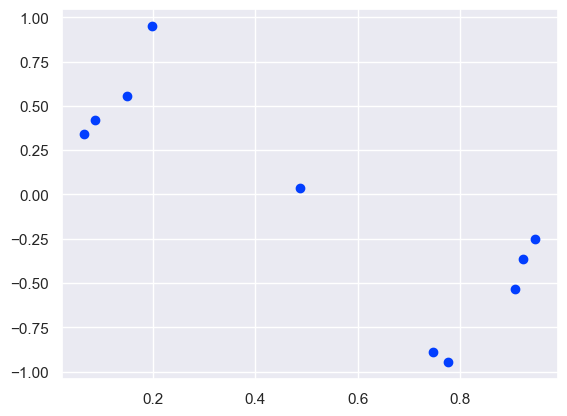

In [245]:
plt.scatter(x_train, y_train)

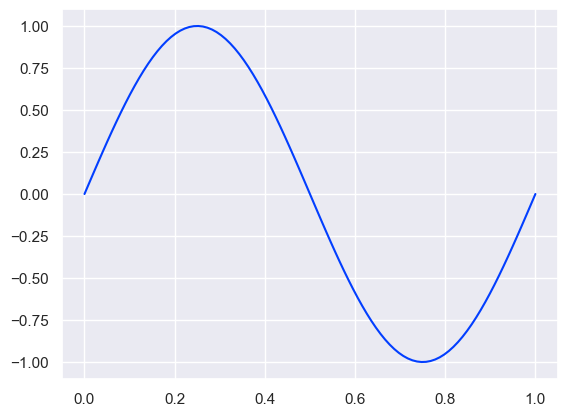

In [246]:
plt.plot(x_test, y_test, '-')

## 1) Linear models

Write down the function named linear that takes data point x (scalar), a basis function, and weights (list|ndarray (Mx1) and returns the output of linear basis function model (2nd equation in slide 5 of lecture 11, eq (3.3) in text book). The basis function (Phi(x)) that goes as input to linear will be defined later but it takes x (scalar) and i (index) and returns Phi_i(x) (which is a scalar).

In [247]:
def linear(x, basis, weights):
    # x in R^N
    # xi in R^1x1 
    # w in R^Mx1
    # ⏀(xi) in R^1xM
    # ⏀(x) in R^NxM
    # wT*⏀(x) in R^Mx1

    M = weights.shape[0]
    phix = np.array([basis(x, j) for j in range(M)])
    
    phix[0] = 1                              # phi0(x) = 1
    y = weights.T @ phix
    # y = sum([     weights.T[0][j] * basis(x, j) if j > 0                      # wj * phij(x)
    #          else weights.T[0][0] * 1                    for j in range(M) ]) # phi0(x) = 1.
    return y 

### 1.1) Polynomial basis function

In `create_polynomial` below, write the code of `polynomial` function that takes data point `x` (scalar) and `i` (index) and returns the i-th value (scalar) of a polynomial basis function Phi_i(x) (see equation in slide 7 of lecture 11).

In [248]:
def create_polynomial():
    def polynomial(x, i):
        return x**i
    return polynomial

Plot the different polynomial basis functions for input x ranging from -1 to 1.

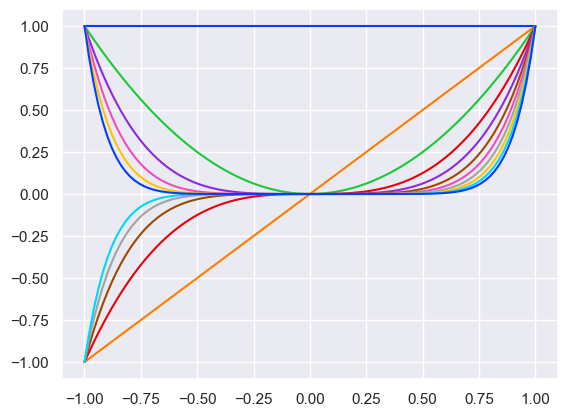

In [249]:
x = np.linspace(-1, 1, 100)
n = 11

polynomial = create_polynomial()

for i in range(n):
    y = list(map(lambda x: polynomial(x, i), x))
    plt.plot(x, y, '-')

### 1.2) Radial basis function

In create_radial function below, write the code of radial function that takes data point x (scalar) and i (index) and returns the i-th value (scalar) of a radial basis function Phi_i(x) (see equation in slide 8 of lecture 11). The outer create_radial function takes mean and variance as input which are used by the radial function.

In [250]:
def create_radial(means, variance):
   
    def radial(x, i):
        phix = np.exp(-((x - means[i])**2)/(2*variance))
        return phix
    
    return radial

Plot the different radial basis functions for input x ranging from -1 to 1.

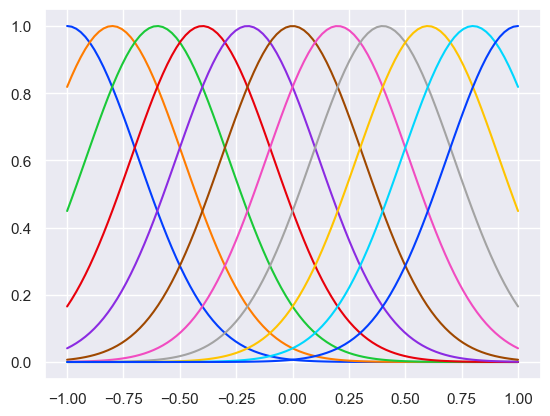

In [251]:
x = np.linspace(-1, 1, 100)
n = 11

radial = create_radial(np.linspace(-1, 1, 11), 0.1)

for i in range(n):
    y = list(map(lambda x: radial(x, i), x))
    plt.plot(x, y, '-')

### 1.3) Sigmoidal basis function

In create_sigmoidal function below, write the code of sigmoidal function that takes data point x (scalar) and i (index) and returns the i-th value (scalar) of a radial basis function Phi_i(x) (see equation in slide 9 of lecture 11). The outer create_sigmoidal function takes mean and s as input which are used by the sigmoidal function.

In [252]:
def create_sigmoidal(means, s):
    def sigmoidal(x, i):
        a = (x - means[i])/s
        phixi = 1/(1 + np.exp(-a))
        return phixi    
    return sigmoidal

Plot the different sigmoidal basis functions for input x ranging from -1 to 1.

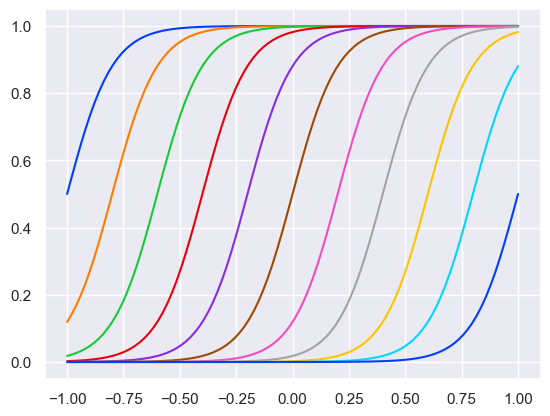

In [253]:
x = np.linspace(-1, 1, 100)
n = 11

sigmoidal = create_sigmoidal(np.linspace(-1, 1, 11), 0.1)

for i in range(n):
    y = list(map(lambda x: sigmoidal(x, i), x))
    plt.plot(x, y, '-')

### 1.4) Optimization of Error function

write the `optimial_weights` function that takes `basis` function (linear function that takes `x` (scalar) and `i` (index)), `inputs` (list Nx1), `targets` (list Nx1), and `M` (scalar number of weights) as parameters and returns optimal weights (list|ndarray (Mx1)) for this data and basis function. The output weights from this function should correspond to the output of the last equation given in slide 11 of lecture 11. 

In [254]:
def optimial_weights(basis, inputs, targets, M):
     N = inputs.shape[0]
     
     #    [φ0(x0) , φ1(x0), ..., φM(x0)]
     #    [φ0(x1) , φ1(x1), ..., φM(x1)]
     #    [ ...   ,  ...  , ...,  ...  ]
     #    [φ0(xN) , φ1(xN), ..., φM(xN)]
     Phi = np.array([[basis(inputs[i], j) if j > 0 
                      else 1 
                                                   for j in range(M)]
                                                   for i in range(N)])
     # (MxN @ NxM) => (MxM) -> (MxM @ MxN) => (MxN) -> (MxN) @ (Nx1) => (Mx1)
     w_optimal = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ targets.reshape(-1, 1) # (10,) -> (10, 1) 
     return w_optimal

### 1.5) Test models

In [255]:
def test(basis, M, label=''):
    plt.plot(x_test, list(map(lambda x: linear(x, basis, optimial_weights(basis, x_train, y_train, M)), x_test)), '-', label=label)
    plt.plot(x_train, y_train, 'og')
    plt.legend()

The following code will test the performance of the optimal model using different basis function on input data generated at the start of the notebook. Which model you believe performs the best on this data? Does the model size affect the model performance?

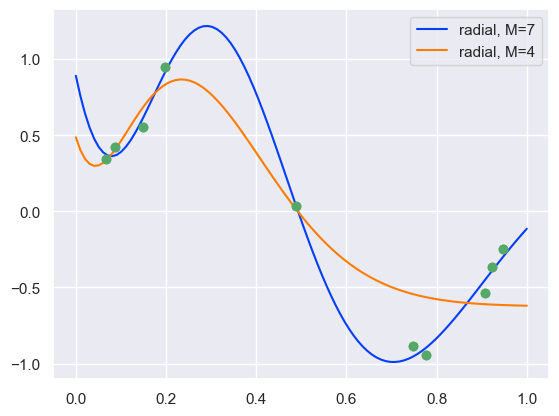

In [256]:
test(create_radial(np.linspace(-1, 1, 10), 0.1), 7, 'radial, M=7') # Looks a tiny bit worse than the programming exercise answer.
test(create_radial(np.linspace(-1, 1, 10), 0.1), 4, 'radial, M=4') # Looks better than the programming exercies answer
#       Taking into account my plot when viewing from y = -1, ... 3 

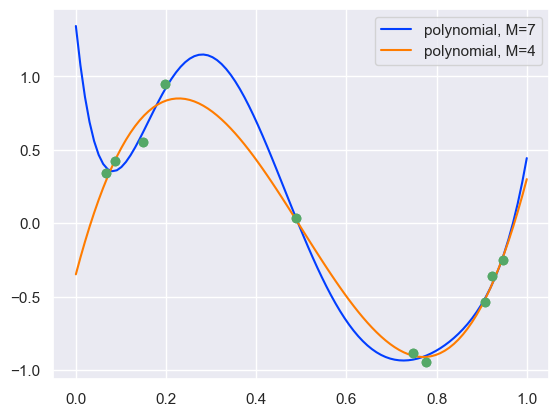

In [257]:
test(create_polynomial(), 7, 'polynomial, M=7')
test(create_polynomial(), 4, 'polynomial, M=4')
# Both looks exactly the same as the programming exercise answers 

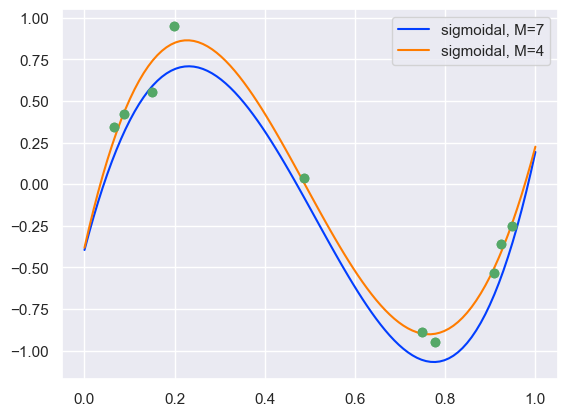

In [258]:
test(create_sigmoidal(np.linspace(0, 1, 8), 1), 7, 'sigmoidal, M=7') # Looks a tiny bit better than the programming exercise answer
test(create_sigmoidal(np.linspace(0, 1, 8), 1), 4, 'sigmoidal, M=4') # Looks exactly the same as the programming exercise answer


# ----------- Post plot comment -----------
I had the exact same plots as for the programming exercises, 
but as I realised that I forgot to make sure, that phi0(x) = 1, my plots got a little different.


## 2) Bayesian Linear Regression 

### 2.1) Generate data

The following functions generate training and test data corresponding to a linear function. The data corresponds to a regression problem where individual input x and output y are both scalars.

In [259]:
def line_func(x): return -0.5 + 0.3 * x

def generate_line_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = line_func(x_train) + rng.normal(scale=0.05, size=size)
    x_test = np.linspace(0., 1., 100)
    y_test = line_func(x_test)
    
    return x_train, y_train, x_test, y_test

xl_train, yl_train, xl_test, yl_test = generate_line_data(25)

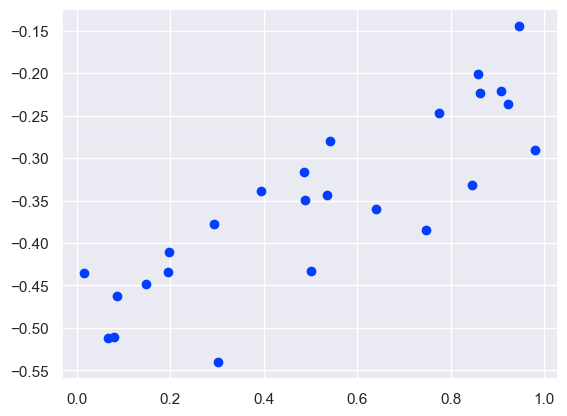

In [260]:
plt.scatter(xl_train, yl_train)

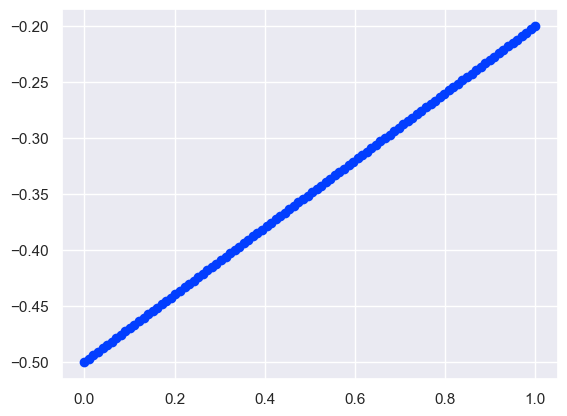

In [261]:
plt.scatter(xl_test, yl_test)

### 2.2) Fit the data

write the bayessian_regression_fit function that takes PHI (ndarray NxM), t (ndarray Nx1 targets), alpha (scalar) and beta (scalar) as parameters and must return mean (ndarray Mx1) , and covariance (ndarray MxM) for the weight vector using a Bayesian approach (see slide 14 in lecture 12).

In [262]:
def bayessian_regression_fit(PHI, t, alpha, beta):
    mN = "" 
    N, M = PHI.shape
    S0 = alpha * np.eye(M) 
    # For my first iteration I set it to be alpha^-1 @ I 
    # S0^-1 => alpha @ I 
    # Haven't got a m0 so I'm setting the first mean to be zero.  
    SNinv = alpha * np.eye(M) + beta * PHI.T @ PHI
    SN = np.linalg.inv(SNinv)
    mN = SN @ (beta * PHI.T @ t) # removed the content with m0 as this would have been multiplication by 0.
    return (mN, SN)

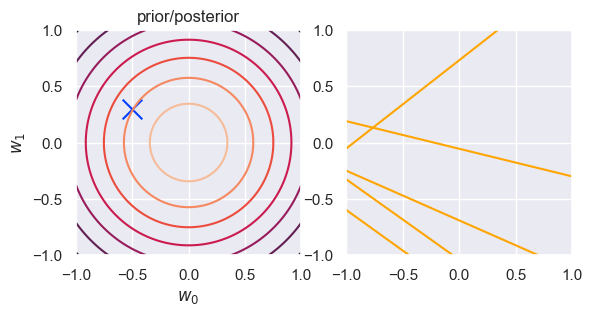

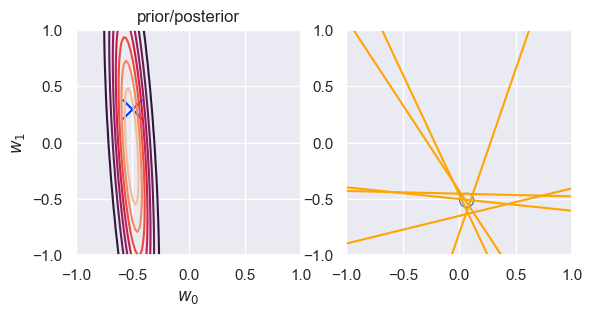

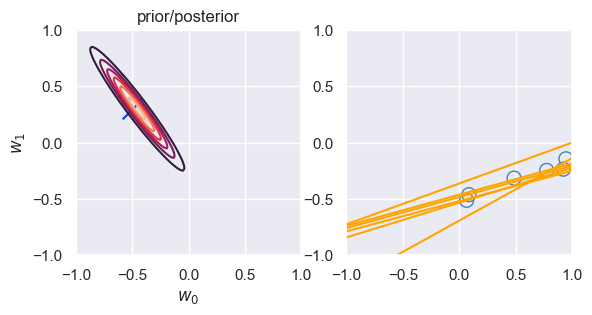

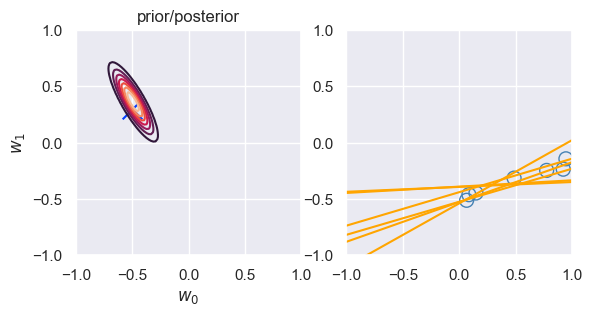

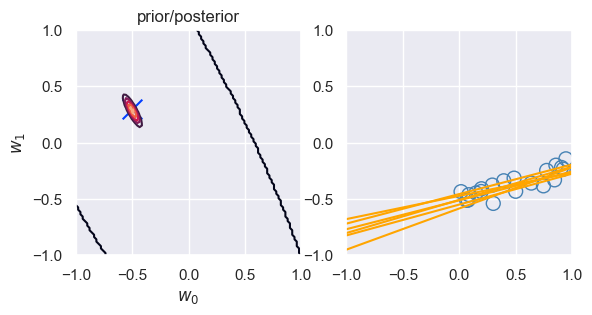

In [263]:
alpha = 1
beta = 100

x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100)
)
w = np.array([w0, w1]).transpose(1, 2, 0)

basis = create_polynomial()

M = 1

PHI = np.array([[basis(x[q], i) for q in range(len(x))] for i in range(M + 1)]).T
PHI_train = np.array([[basis(xl_train[q], i) for q in range(len(xl_train))] for i in range(M + 1)]).T
# Added code to make sure that Phi0(xvec) = 1
# Phi in NxM 
PHI[:, 0] = 1
PHI_train[:, 0] # Wasn't actually neccersary with this basis as x^0 = 1 already, but now it's secure for other basi


for begin, end in [[0, 0], [0, 1], [3, 6], [4, 7], [3, 20]]:
    w_mean, w_cov = bayessian_regression_fit(PHI_train[begin:end], yl_train[begin:end], alpha, beta)
    
    w_sample = np.random.multivariate_normal(
        w_mean.reshape(-1), w_cov, size=6
    )
    y_sample = PHI @ w_sample.T
    
    
    plt.subplot(1, 2, 1)
    plt.scatter(-0.5, 0.3, s=200, marker="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, mean=w_mean, cov=w_cov))
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")

    plt.subplot(1, 2, 2)
    plt.scatter(xl_train[:end], yl_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=1)
    plt.plot(x, y_sample, c="orange")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# ----------- Post view comment -----------
The contour of our multivariate normal distribution form our means and covariances looks familiar, but the y_sample seems a bit off



# 

### 2.3) Predictive distribution

write the sample function which takes PHI_train (ndarray NxM), y_train (ndarray Nx1), alpha (scalar), beta (scalar), and PHI_test as parameters and returns y (ndarray N_test x 1 prediction means) and y_std (ndarray N_test x 1 prediction standard deviations). See slide 16 in lecture 12 for more details on how to implement the function.

In [264]:
def sample(PHI_train, y_train, alpha, beta, PHI_test):
    # PHI_train in R^NxM
    # y_train   in R^N
    # PHI_test  in R^KxM
    N, M = PHI_train.shape
    K = PHI_test.shape[0]
    mN, SN = bayessian_regression_fit(PHI_train, y_train, alpha, beta) # Adjusting the bayessian regression model
    mN = mN.reshape(-1, 1) # real vector now.

    mean_predicted = np.zeros(K)
    var_predicted = np.zeros(K)
    mean_pred = lambda mN, phi :                           mN.T @ phi 
    var_pred = lambda beta, phi, SN :                      1/beta + (phi.T) @ SN @ phi
    
    for j in range(K): 
        test = PHI_test[j, :].reshape(-1, 1)
        mean_predicted[j] = mean_pred(mN, test)
        var_predicted[j] = var_pred(beta, test, SN)

    sd = np.sqrt(var_predicted)
    return (mean_predicted, sd)

In [ ]:
alpha = 1e-3
beta = 2
x_train, y_train, x_test, y_test = generate_data(25)

basis = create_radial(np.linspace(0, 1, 9), 0.1)

M = 8

# Rewriting code to make sure, that phi0(x) = 1
# Phi in R^NxM : Phi[:, 0] = 1
PHI_train = np.array([[basis(x_train[q], i) for q in range(len(x_train))] for i in range(M + 1)]).T; PHI_train[:, 0] = 1
PHI_test = np.array([[basis(x_test[q], i) for q in range(len(x_test))] for i in range(M + 1)]).T; PHI_test[:, 0] = 1

for begin, end in [[0, 1], [1, 2], [2, 4], [4, 8], [8, 25]]:

    y, y_std = sample(PHI_train[begin:end], y_train[begin:end], alpha, beta, PHI_test)
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=2)
    plt.plot(x_test, y_test)
    plt.plot(x_test, y)
    plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5)
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.show()

# -------------- Post plot comment --------------
Looks exactly the same when I'm not setting the values of the first basis function to be 1. This is the radial basis, so such thing does matter for these basis functions. 

Might just be a misunderstanding for my side, but I just went by the convention of the linear basis functions from slide 5 from lecture 11, and was consisten with it throughtout this assignment. 

"Two ways to define linear models... 
Non linear... w.r.t the input, phi0(x) = 1"
